In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

A/B tests are very commonly performed by data analysts and data scientists.  It is important that we get some practice working with the difficulties of these.

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page.

In [2]:
data=pd.read_csv(r'ab_test.csv')
data

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [3]:
data1=pd.read_csv('countries_ab.csv')
data1.head()

,id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [4]:
data.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [5]:
data.columns=['user_id','time','group','page','converted']

In [6]:
data.head()

,user_id,time,group,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [7]:
data.shape

(294478, 5)

In [8]:
data.isnull().sum()

user_id      0
time         0
group        0
page         0
converted    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    294478 non-null  int64 
 1   time       294478 non-null  object
 2   group      294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
data.nunique()

user_id      290584
time          35993
group             2
page              2
converted         2
dtype: int64

In [11]:
data['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape[0]-data['user_id'].nunique()

3894

In [14]:
df_dup=data[data['user_id'].duplicated()]
df_dup

,user_id,time,group,page,converted
2656,698120,13:42.6,control,old_page,0
2893,773192,55:59.6,treatment,new_page,0
7500,899953,06:54.1,control,new_page,0
8036,790934,32:20.3,treatment,new_page,0
10218,633793,16:00.7,treatment,old_page,0
...,...,...,...,...,...
294308,905197,56:47.5,treatment,new_page,0
294309,787083,15:21.0,control,old_page,0
294328,641570,59:27.7,control,old_page,0
294331,689637,34:28.3,control,new_page,0


In [15]:
df_dup.shape[0]/data.shape[0]*100

1.3223398691922656

In [16]:
data[data['user_id'].duplicated(keep=False)].sort_values('user_id')

,user_id,time,group,page,converted
230259,630052,16:05.2,treatment,new_page,0
213114,630052,25:54.1,treatment,old_page,1
22513,630126,35:54.8,treatment,old_page,0
251762,630126,16:00.3,treatment,new_page,0
183371,630137,08:49.9,control,old_page,0
...,...,...,...,...,...
142354,945703,40:51.2,control,new_page,0
186960,945797,23:21.8,control,old_page,0
40370,945797,04:49.4,control,new_page,1
165143,945971,09:18.4,control,old_page,0


In [21]:
d1=data[(data['group']=='control') & (data['page']=='new_page')]
d1

,user_id,time,group,page,converted
22,767017,58:15.0,control,new_page,0
240,733976,11:16.4,control,new_page,0
490,808613,44:01.3,control,new_page,0
846,637639,09:52.7,control,new_page,1
850,793580,25:33.7,control,new_page,1
...,...,...,...,...,...
293894,741581,49:03.4,control,new_page,0
293996,942612,52:28.2,control,new_page,0
294200,928506,32:10.5,control,new_page,0
294253,886135,49:20.5,control,new_page,0


In [27]:
d2=data[(data['group']=='treatment') & (data['page']=='old_page')]
d2

,user_id,time,group,page,converted
308,857184,34:59.8,treatment,old_page,0
327,686623,26:40.7,treatment,old_page,0
357,856078,29:30.4,treatment,old_page,0
685,666385,11:54.8,treatment,old_page,0
713,748761,47:44.4,treatment,old_page,0
...,...,...,...,...,...
293773,688144,34:50.5,treatment,old_page,1
293817,876037,15:09.0,treatment,old_page,1
293917,738357,37:55.7,treatment,old_page,0
294014,813406,25:33.2,treatment,old_page,0


In [28]:
d1.shape[0]+d2.shape[0]

3893

In [29]:
d3=data[((data['group']=='treatment') & (data['page']=='new_page'))|((data['group']=='control') & (data['page']=='old_page'))]
d3

,user_id,time,group,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [30]:
d3.nunique()

user_id      290584
time          35991
group             2
page              2
converted         2
dtype: int64

In [33]:
d3[d3.duplicated(subset='user_id',keep=False)]

,user_id,time,group,page,converted
1899,773192,37:58.8,treatment,new_page,0
2893,773192,55:59.6,treatment,new_page,0


In [37]:
d3=d3.drop_duplicates(subset='user_id')
d3

,user_id,time,group,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [79]:
d3['hour']=d3['time'].str.split(':').str[0]

In [77]:
d3['minute']=d3['time'].str.split(':').str[1]

In [75]:
24*2.5

60.0

In [80]:
d3.head()

,user_id,time,group,page,converted,minute,hour
0,851104,11:48.6,control,old_page,0,48.6,11
1,804228,01:45.2,control,old_page,0,45.2,01
2,661590,55:06.2,treatment,new_page,0,06.2,55
3,853541,28:03.1,treatment,new_page,0,03.1,28
4,864975,52:26.2,control,old_page,1,26.2,52


In [81]:
d3['group'].value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [82]:
d3['page'].value_counts()

new_page    145310
old_page    145274
Name: page, dtype: int64

In [108]:
d3[d3['page']=='old_page'].sort_values(['hour','minute'],ascending=False)

,user_id,time,group,page,converted,minute,hour
53535,843186,59:59.9,control,old_page,0,59.9,59
212448,717263,59:59.9,control,old_page,0,59.9,59
21018,939260,59:59.7,control,old_page,0,59.7,59
201274,785244,59:59.7,control,old_page,0,59.7,59
25809,815015,59:59.6,control,old_page,0,59.6,59
...,...,...,...,...,...,...,...
263782,774759,00:00.1,control,old_page,0,00.1,00
45680,817555,00:00.0,control,old_page,0,00.0,00
53529,825480,00:00.0,control,old_page,0,00.0,00
123148,653457,00:00.0,control,old_page,0,00.0,00


In [109]:
d3[d3['page']=='new_page'].sort_values(['hour','minute'],ascending=False)

,user_id,time,group,page,converted,minute,hour
138,652015,59:59.9,treatment,new_page,1,59.9,59
20020,778284,59:59.9,treatment,new_page,0,59.9,59
77669,805084,59:59.9,treatment,new_page,0,59.9,59
101657,904156,59:59.9,treatment,new_page,0,59.9,59
167367,876850,59:59.9,treatment,new_page,0,59.9,59
...,...,...,...,...,...,...,...
34063,674131,00:00.1,treatment,new_page,0,00.1,00
189656,778202,00:00.1,treatment,new_page,0,00.1,00
248784,861204,00:00.1,treatment,new_page,0,00.1,00
282335,933649,00:00.1,treatment,new_page,0,00.1,00


In [119]:
a=[]
for i in d3['hour']:
    if int(i)<=24:
        a.append('1st_day')
    elif int(i)>24 and int(i)<=48:
        a.append('2nd_day')
    else:
        a.append('2_half_day')
        
        

In [121]:
d3['days']=a

In [122]:
d3.head()

,user_id,time,group,page,converted,minute,hour,days
0,851104,11:48.6,control,old_page,0,48.6,11,1st_day
1,804228,01:45.2,control,old_page,0,45.2,01,1st_day
2,661590,55:06.2,treatment,new_page,0,06.2,55,2_half_day
3,853541,28:03.1,treatment,new_page,0,03.1,28,2nd_day
4,864975,52:26.2,control,old_page,1,26.2,52,2_half_day


<AxesSubplot:xlabel='days', ylabel='converted'>

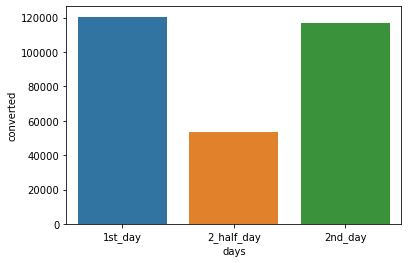

In [145]:
df=d3.groupby('days')['converted'].count().reset_index()
sns.barplot(x='days',y='converted',data=df)

<AxesSubplot:xlabel='days', ylabel='converted'>

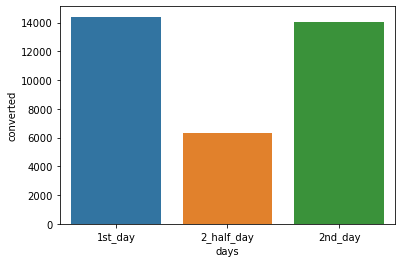

In [140]:
df=d3.groupby('days')['converted'].sum().reset_index()
sns.barplot(x='days',y='converted',data=df)

<AxesSubplot:xlabel='page', ylabel='converted'>

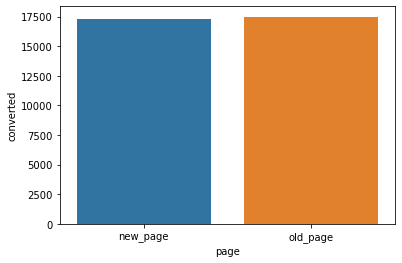

In [155]:
df=d3.groupby('page')['converted'].sum().reset_index()
sns.barplot(x='page',y='converted',data=df)

In [156]:
d3.groupby('page')['converted'].value_counts()

page      converted
new_page  0            128046
          1             17264
old_page  0            127785
          1             17489
Name: converted, dtype: int64

<AxesSubplot:xlabel='page', ylabel='converted'>

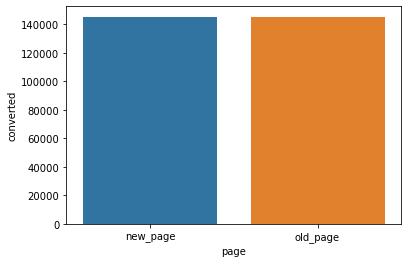

In [147]:
df=d3.groupby('page')['converted'].count().reset_index()
sns.barplot(x='page',y='converted',data=df)

In [167]:
cross_table=pd.crosstab(d3['page'],d3['converted'])
cross_table

converted,0,1
page,,
new_page,128046,17264
old_page,127785,17489


In [153]:
df=d3.groupby('page')['converted'].mean()*100
df

page
new_page    11.880807
old_page    12.038630
Name: converted, dtype: float64

##  hypothesis test

Null Hypothesis (Ho)= New page is not better than the old page(old_mean>=new_mean)
Alternative Hypothesis (Ha)= New page is batter than the old page (old_mean<new_mean)
a=0.005

In [186]:
from statsmodels.stats.proportion import proportions_ztest

In [187]:
out_old=d3[(d3['page']=='old_page')&(d3['converted']==1)].shape[0]
out_new=d3[(d3['page']=='new_page')&(d3['converted']==1)].shape[0]

In [188]:
sample_old=d3[(d3['page']=='old_page')].shape[0]
sample_new=d3[(d3['page']=='new_page')].shape[0]

In [190]:
sample_size=np.array([sample_old,sample_new])
output=np.array([out_old,out_new])

In [191]:
z_value,p_value=proportions_ztest(output,sample_size,alternative='larger')

In [193]:
print('p_value',p_value)
a=0.05
p_value
if p_value>a:
    print('we fail to reject the null Hypothesis (Ho)')
elif p_value<a:
    print('reject the null hypothesis (Ho)')

p_value 0.09494168724097551
we fail to reject the null Hypothesis (Ho)
